<a href="https://colab.research.google.com/github/SergiiRv/first/blob/master/Brian2_tLab2_SergiiRomanenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install brian2

In [169]:
%matplotlib inline
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
#from neuron import h
import seaborn as sns
import pandas as pd
#import brian2 as b2


# Let's create a playground

In [177]:
from brian2 import *

class MyNetwork:

    def __init__(self, num_neurons = 300, simulation_time = 1000, THRSLD = 30, freq = 200, sIapp = 0.15):
        self.num_neurons = num_neurons
        self.THRSLD = THRSLD
        self.freq = freq
        self.Iapp = sIapp
        self.spike_i = None
        self.spike_count = None
        #self.spike_monitor = None
        self.state_monitor = None
        self.spikes_t = None
        self.state_t = None
        self.simulation_time = simulation_time*ms # Simulation time in milliseconds
        self.dt = 0.025  # Time step in milliseconds

    def create_network(self):

        """

        """
        # Define neuron model
        a=0.1
        b=0.26
        c=-65.
        d=-1.
        U=-15
        V =-51
        Iapp = self.Iapp
        tau1 = 2 * ms
        tau2 = 5 * ms
        Esyn =  -70.0
        Th = self.THRSLD
        FQ = self.freq

        defaultclock.dt = 0.025 * ms

        print(defaultclock.dt)

        EQU = """
              dv/dt = (0.04 *v**2 + 5*v + 140 - u + Iapp*cos(t/ms*2*pi/FQ) + (sb-sa)*(Esyn-v))/ms :1
              du/dt = a*(b*v-u)/ms                                              :1
              dsa/dt = -sa/tau1 :1
              dsb/dt = -sb/tau2 :1
              """

        # Create the neurons and other Brian2 objects
        n = NeuronGroup(self.num_neurons,
                              EQU,
                              threshold = 'v>Th',
                              reset = 'v=c; u=u+d',
                              refractory = 1*ms)
        n.v = -62. + rnd.randn(self.num_neurons)*20
        n.u = -15. + rnd.randn(self.num_neurons)*5

        p = PoissonInput(n, "v", 10, 10*Hz, weight= 1.0)

        s = Synapses(n, n, 'w:1',
                     on_pre = """
                     sa_post +=w
                     sb_post +=w
                             """)
        s.connect(p=0.25)
        s.w = 0.03
        s.delay = 3*ms


        sm = SpikeMonitor(n)
        stm = StateMonitor(n, ['v', 'u'], record = [0, int(self.num_neurons/2), self.num_neurons-1])

        run(self.simulation_time)

        self.spike_i = array(sm.i)
        self.spike_count = array(sm.count)
        self.spikes_t = array(sm.t/ms)
        self.state_monitor = array(stm.v[:])
        self.state_t = array(stm.t/ms)

        """

        print(self.spike_i)
        print("--------------------------------------------------------------------------------------------------")
        print(sm.i, array(sm.i))
        print("==================================================================================================")
        print(self.spike_count)
        print(self.state_monitor)
        """



    """
    def run_simulation(self):
        # Run simulation
        #self.neuron_group.v = 'rand()'  # Initialize membrane potentials randomly
        # Create monitors to record variables
        #self.spike_monitor = SpikeMonitor(self.n)
        #self.state_monitor = StateMonitor(self.n, ['v', 'u'], record = [0, 149, 299])

        #run(self.simulation_time)
    """


In [171]:
# Create an instance of MyNetwork
my_network = MyNetwork(num_neurons=300)

# Create and run the network
my_network.create_network()

25. us


# The role of input stimulatory current in synchrony in network

25. us
----------------------The current Iapp is  =  0.0
25. us
----------------------The current Iapp is  =  0.08333333333333333
25. us
----------------------The current Iapp is  =  0.16666666666666666
25. us
----------------------The current Iapp is  =  0.25
25. us
----------------------The current Iapp is  =  0.3333333333333333
25. us
----------------------The current Iapp is  =  0.41666666666666663
25. us
----------------------The current Iapp is  =  0.5


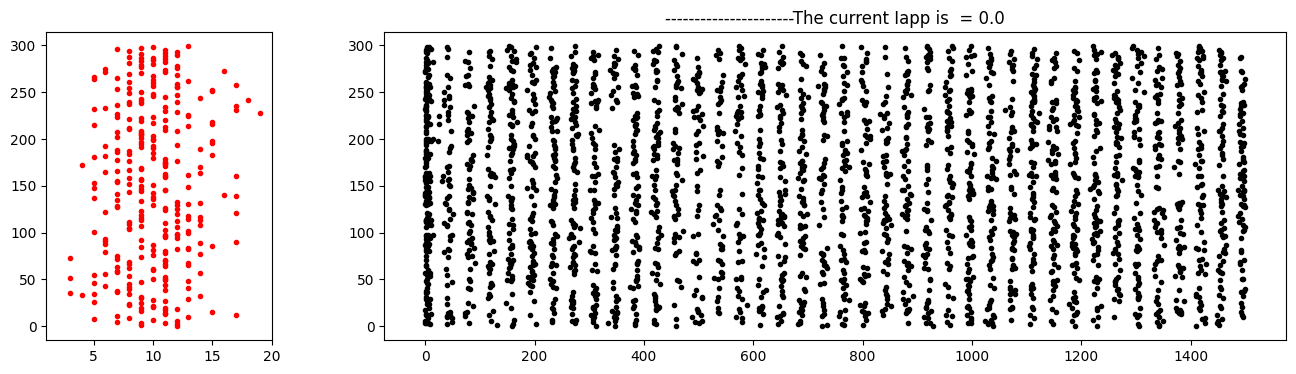

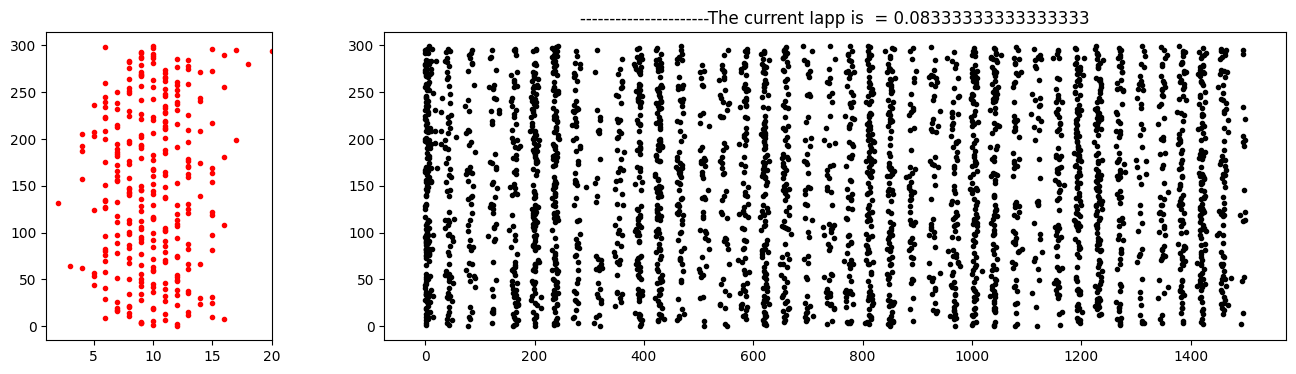

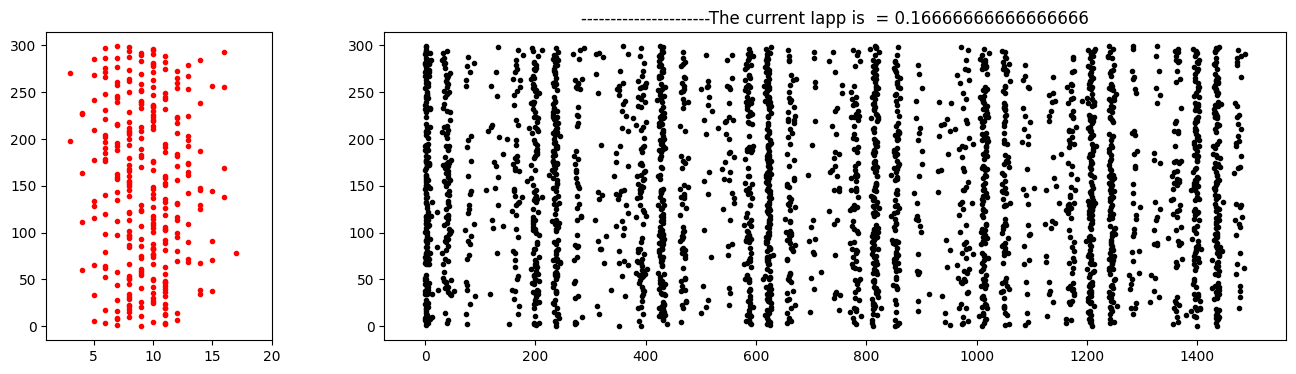

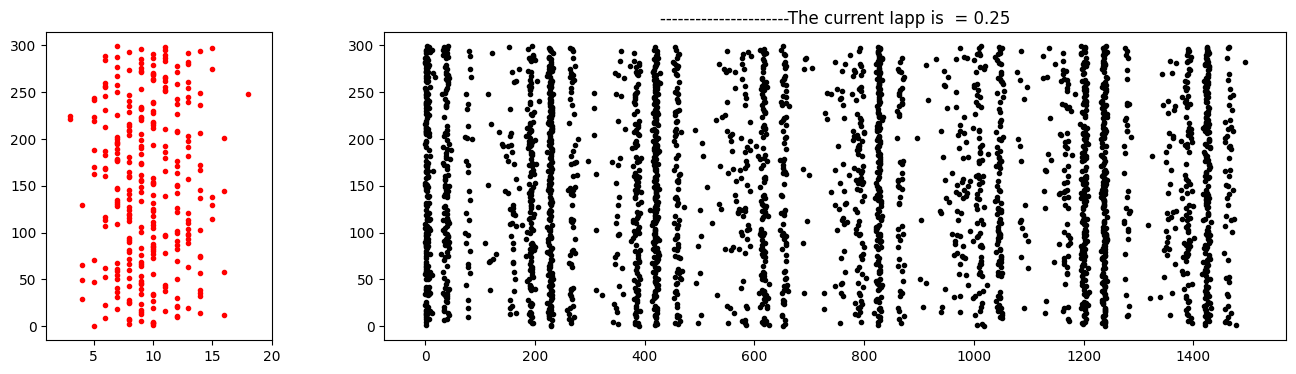

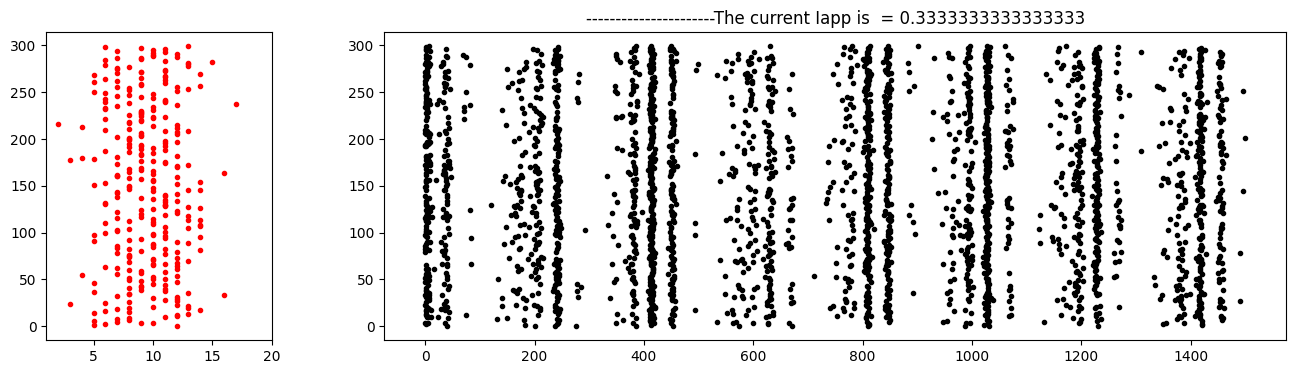

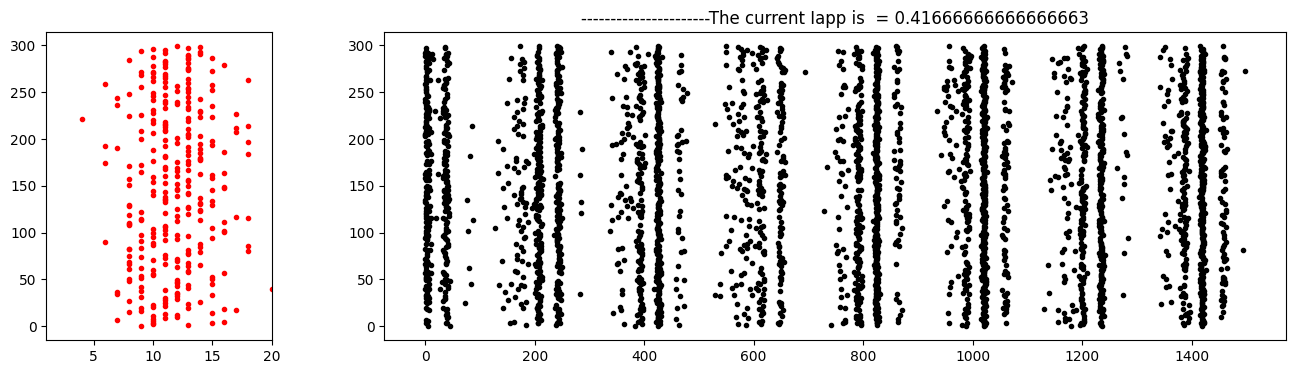

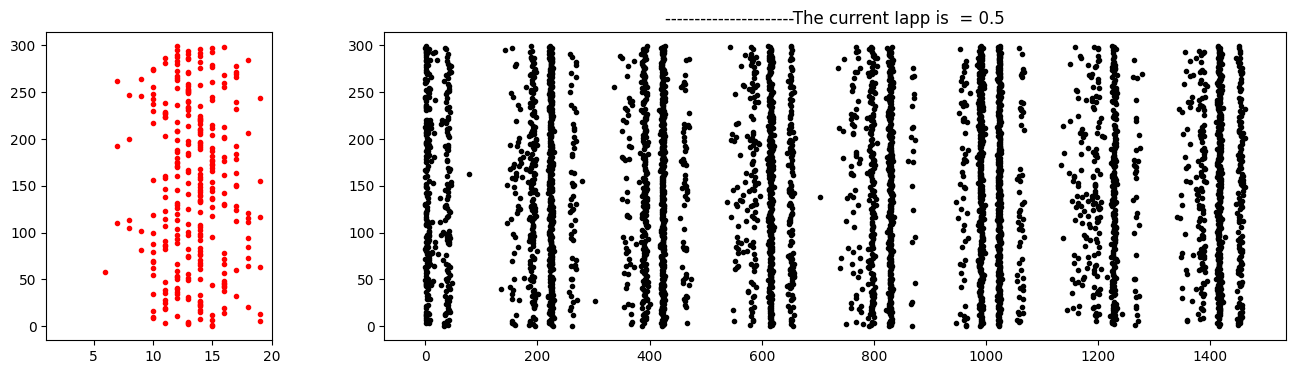

In [172]:
X = linspace(0, 0.5, 7)

for x in X:
  my_network = MyNetwork(num_neurons = 300, simulation_time = 1500, THRSLD = 30, freq = 200, sIapp = x)
  my_network.create_network()
  print("----------------------The current Iapp is  = ",x)
  fig, ax = plt.subplots(1, 2,figsize=(16, 4), gridspec_kw={'width_ratios': [1, 4]})
  plt.subplot(121)
  plt.plot(my_network.spike_count,arange(my_network.spike_count.shape[0]), ".r")
  plt.xlim([1, 20])
  plt.subplot(122)
  plt.plot(my_network.spikes_t, my_network.spike_i, ".k")
  plt.title("----------------------The current Iapp is  = "+str(x))


# External el.mag pase period

25. us


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.08s). [brian2.stateupdaters.base.method_choice]


----------------------The current Stim_Freq is  =  5.0
25. us


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current Stim_Freq is  =  48.888888888888886
25. us


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current Stim_Freq is  =  92.77777777777777
25. us


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current Stim_Freq is  =  136.66666666666666
25. us


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current Stim_Freq is  =  180.55555555555554
25. us


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.10s). [brian2.stateupdaters.base.method_choice]


----------------------The current Stim_Freq is  =  224.44444444444443
25. us


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current Stim_Freq is  =  268.3333333333333
25. us


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current Stim_Freq is  =  312.2222222222222
25. us


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current Stim_Freq is  =  356.1111111111111
25. us


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.06s). [brian2.stateupdaters.base.method_choice]


----------------------The current Stim_Freq is  =  400.0


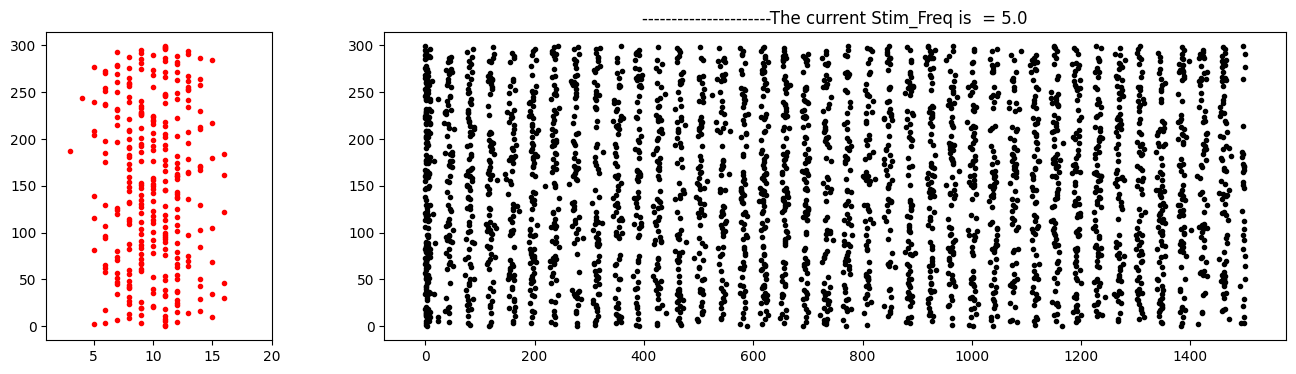

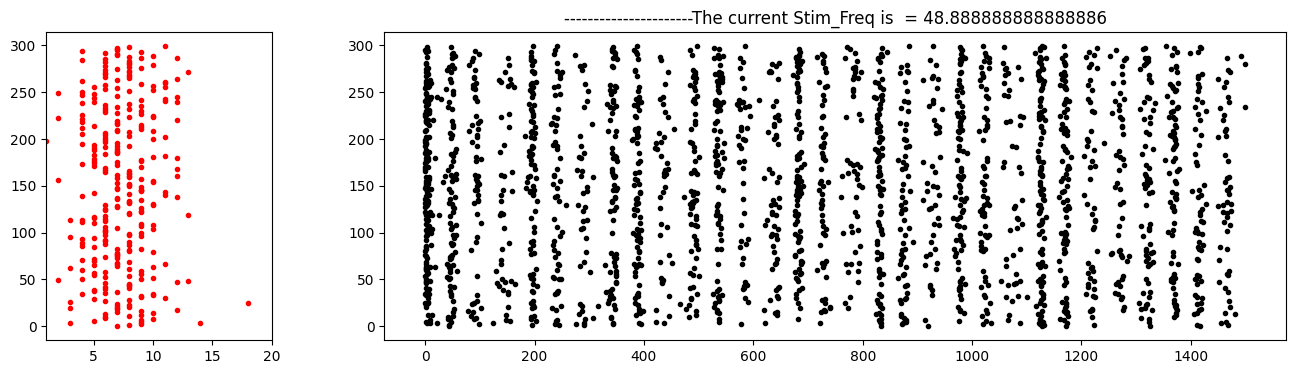

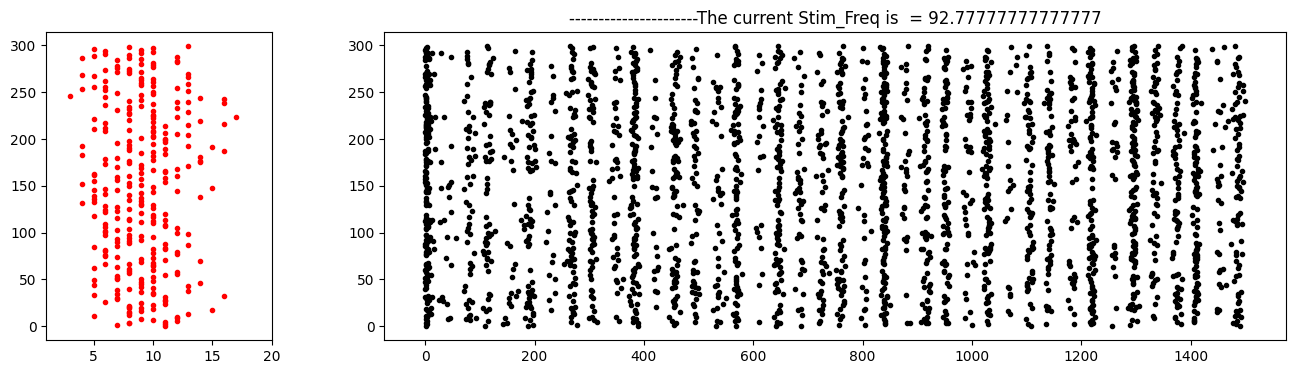

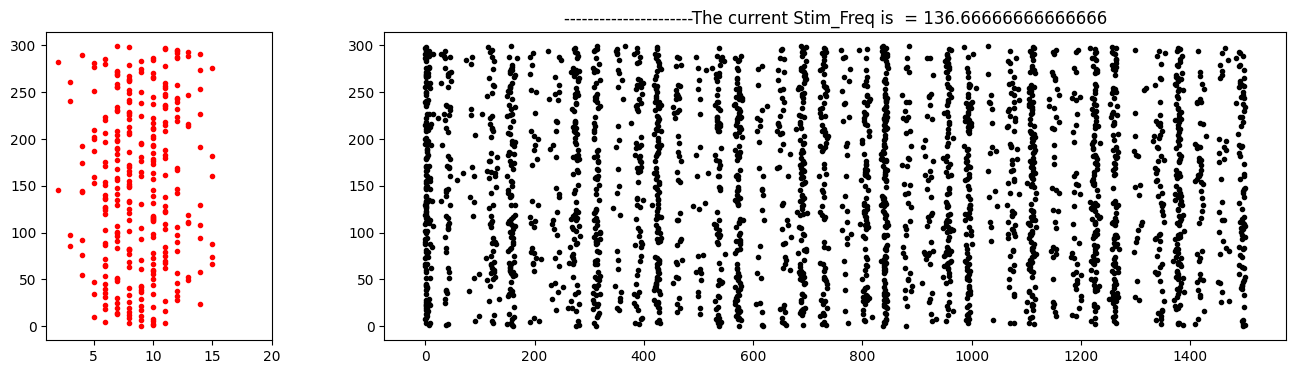

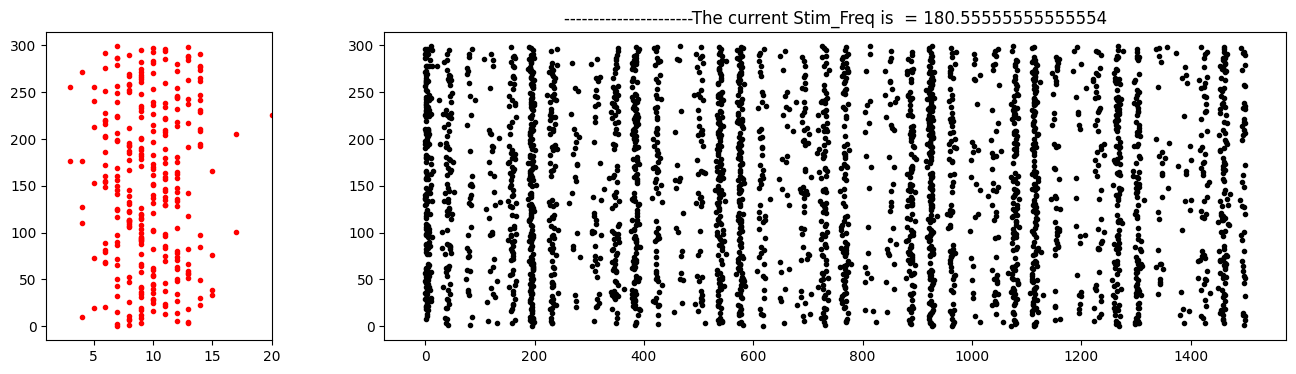

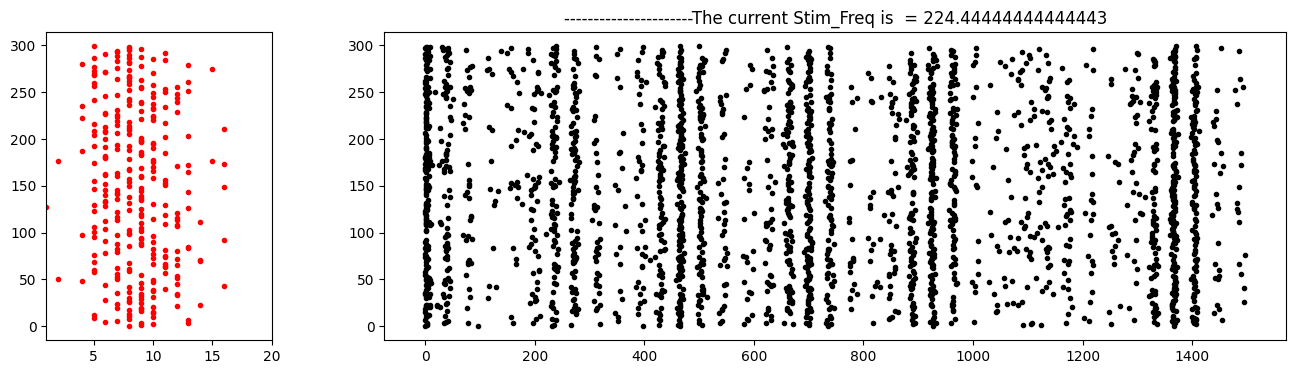

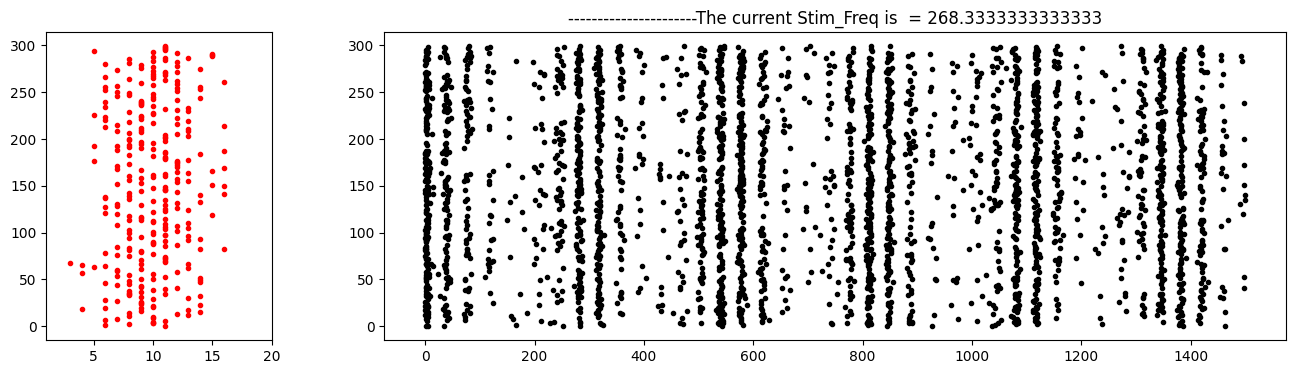

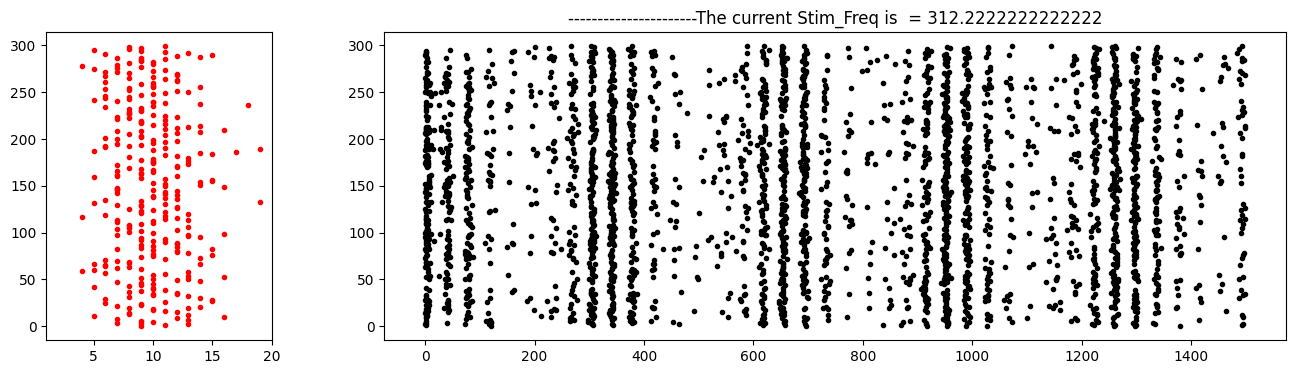

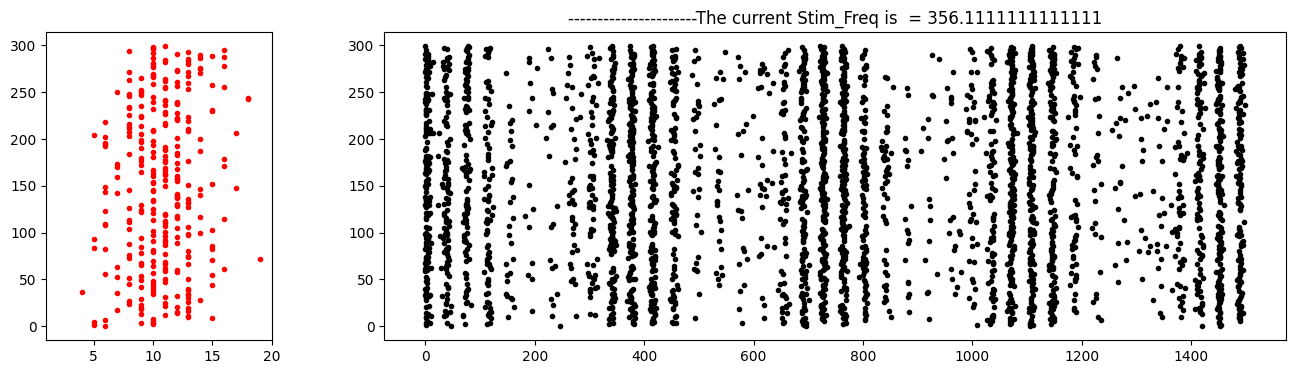

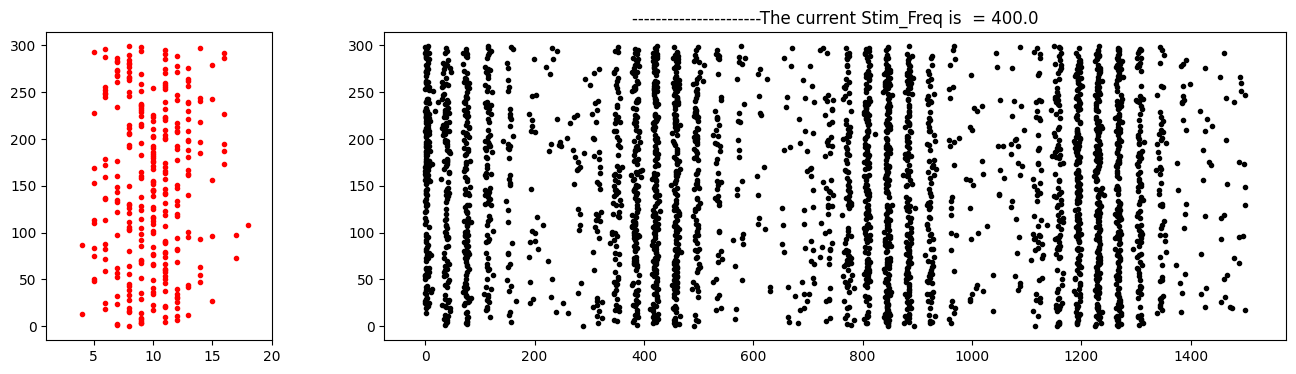

In [173]:
X = linspace(5, 400, 10)

for x in X:
  my_network = MyNetwork(num_neurons = 300, simulation_time = 1500, THRSLD = 30, freq = x, sIapp = 0.15)
  my_network.create_network()
  print("----------------------The current Stim_Freq is  = ",x)
  fig, ax = plt.subplots(1, 2,figsize=(16, 4), gridspec_kw={'width_ratios': [1, 4]})
  plt.subplot(121)
  plt.plot(my_network.spike_count,arange(my_network.spike_count.shape[0]), ".r")
  plt.xlim([1, 20])
  plt.subplot(122)
  plt.plot(my_network.spikes_t, my_network.spike_i, ".k")
  plt.title("----------------------The current Stim_Freq is  = "+str(x))

# the role of activation Threshold

25. us
----------------------The current Threshold is  =  10.0
25. us
----------------------The current Threshold is  =  25.0
25. us
----------------------The current Threshold is  =  40.0
25. us
----------------------The current Threshold is  =  55.0
25. us
----------------------The current Threshold is  =  70.0


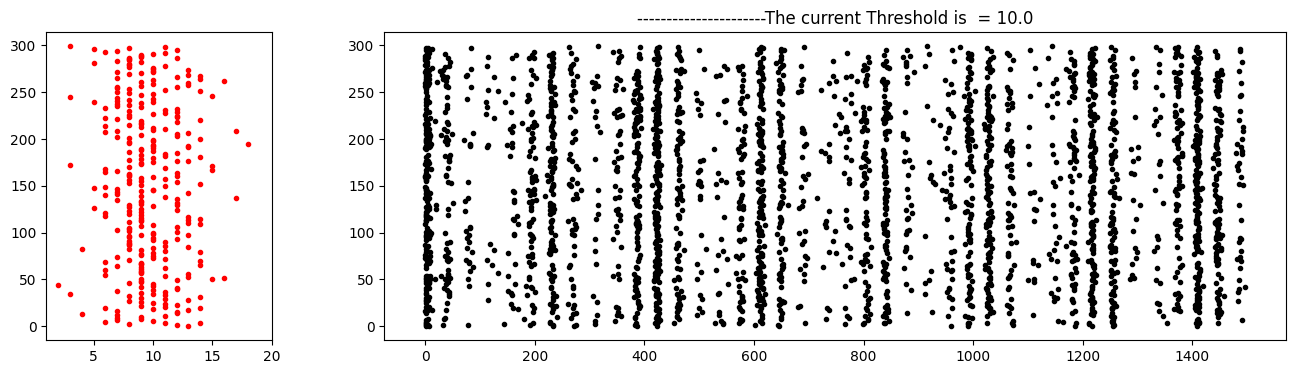

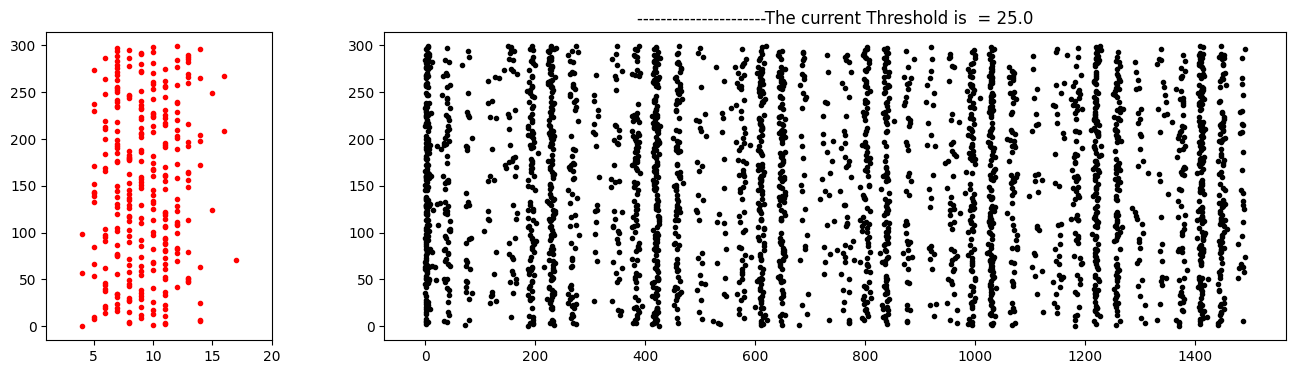

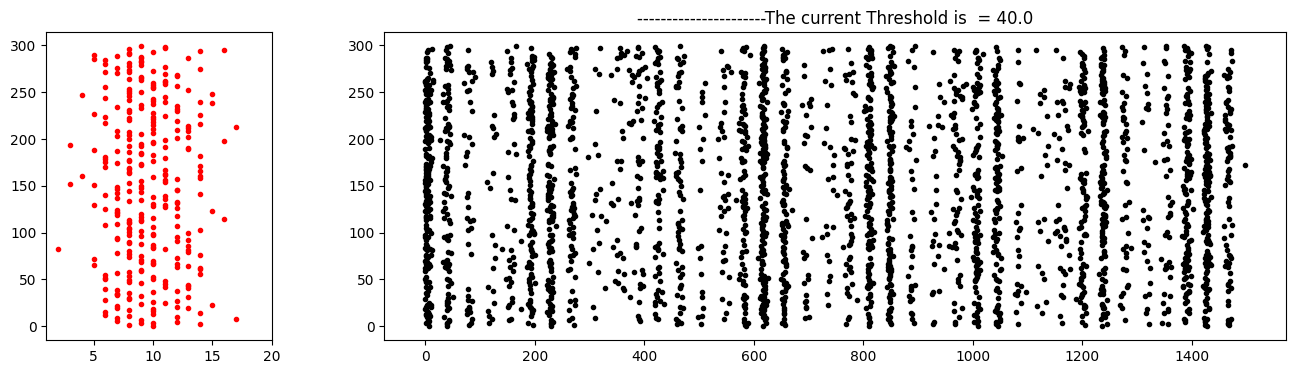

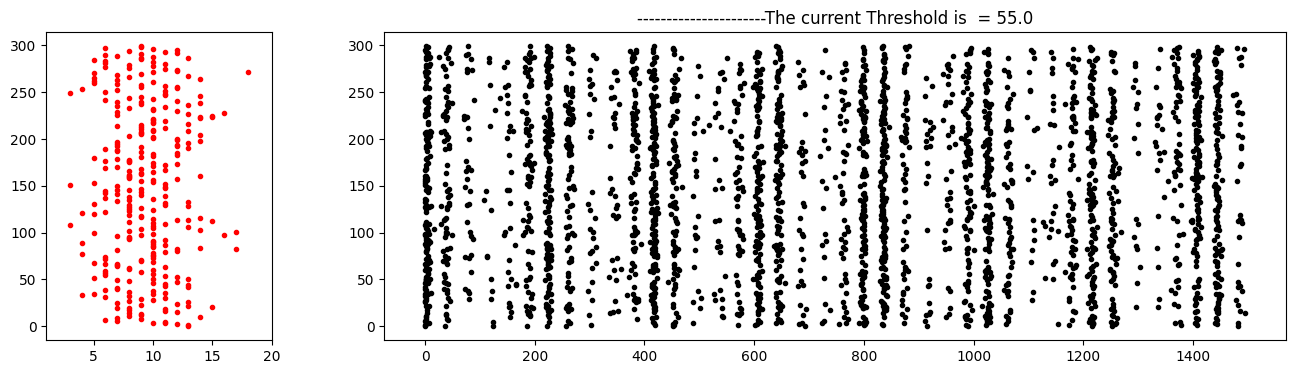

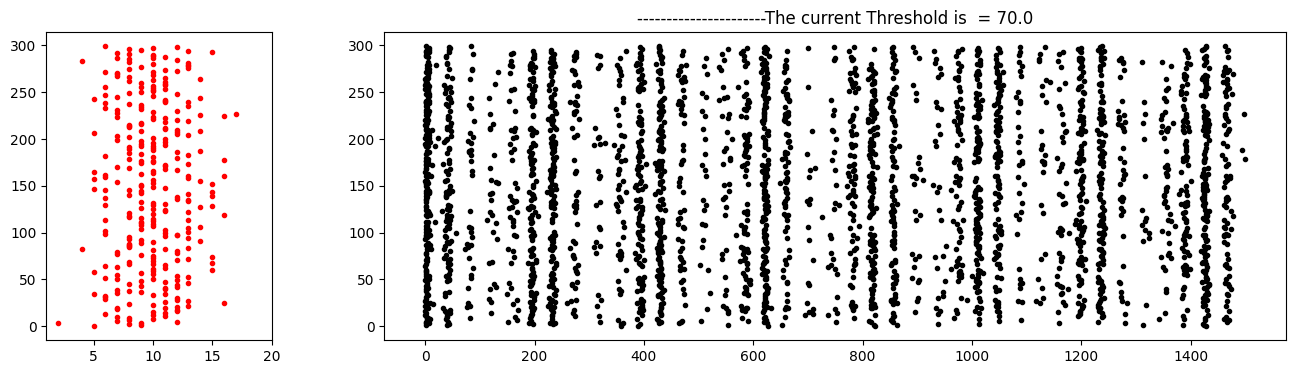

In [174]:
X = linspace(10, 70, 5)

for x in X:
  my_network = MyNetwork(num_neurons = 300, simulation_time = 1500, THRSLD = x, freq = 200, sIapp = 0.15)
  my_network.create_network()
  print("----------------------The current Threshold is  = ",x)
  fig, ax = plt.subplots(1, 2,figsize=(16, 4), gridspec_kw={'width_ratios': [1, 4]})
  plt.subplot(121)
  plt.plot(my_network.spike_count,arange(my_network.spike_count.shape[0]), ".r")
  plt.xlim([1, 20])
  plt.subplot(122)
  plt.plot(my_network.spikes_t, my_network.spike_i, ".k")
  plt.title("----------------------The current Threshold is  = "+str(x))

# role of number of neurons

25. us


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current number is  =  50.0
25. us


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current number is  =  88.88888888888889
25. us


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current number is  =  127.77777777777777
25. us


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.09s). [brian2.stateupdaters.base.method_choice]


----------------------The current number is  =  166.66666666666666
25. us


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.08s). [brian2.stateupdaters.base.method_choice]


----------------------The current number is  =  205.55555555555554
25. us


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current number is  =  244.44444444444443
25. us


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current number is  =  283.3333333333333
25. us


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current number is  =  322.2222222222222
25. us


INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current number is  =  361.1111111111111
25. us


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]


----------------------The current number is  =  400.0


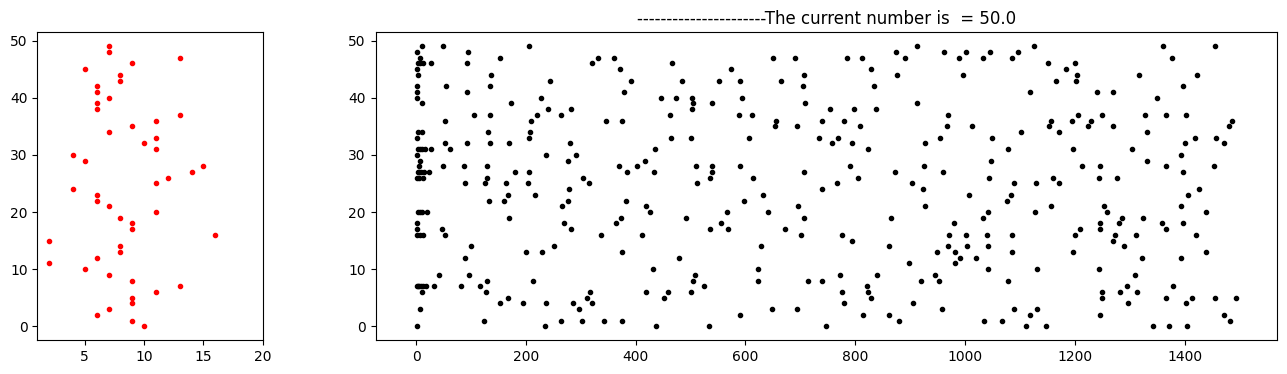

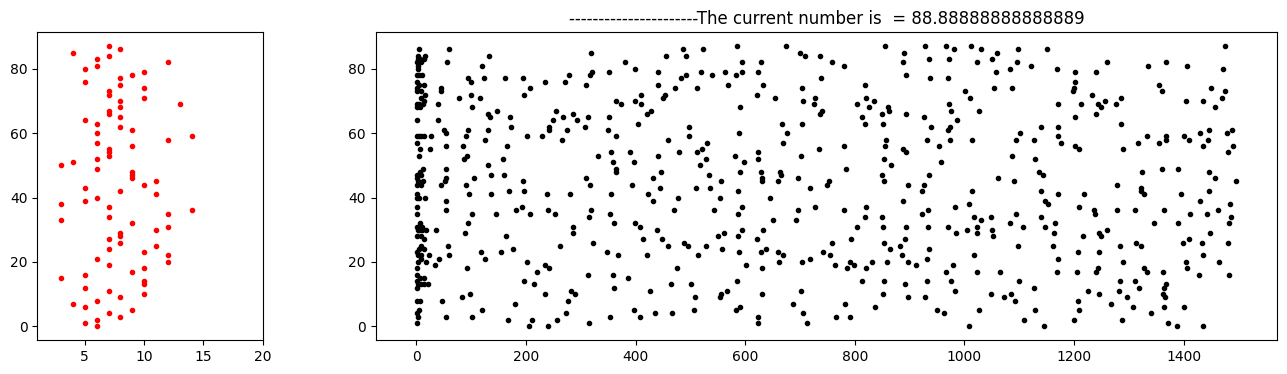

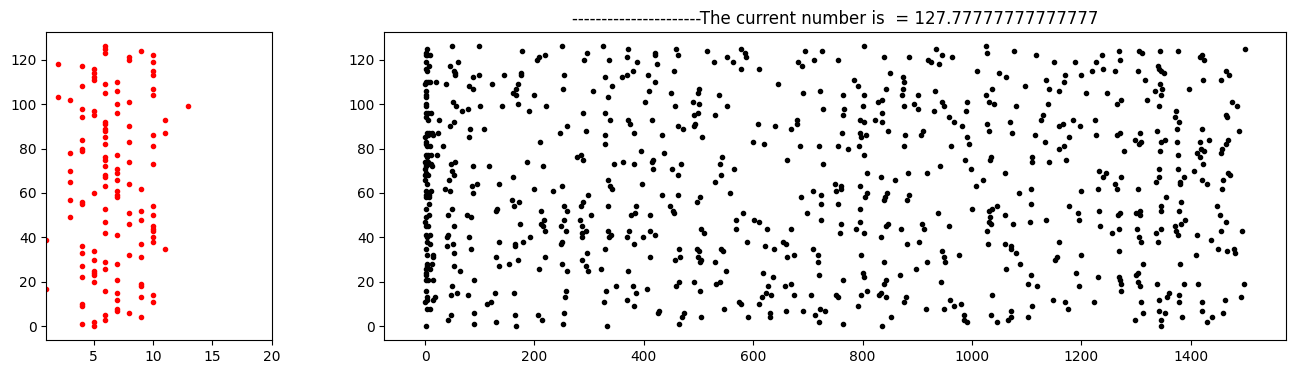

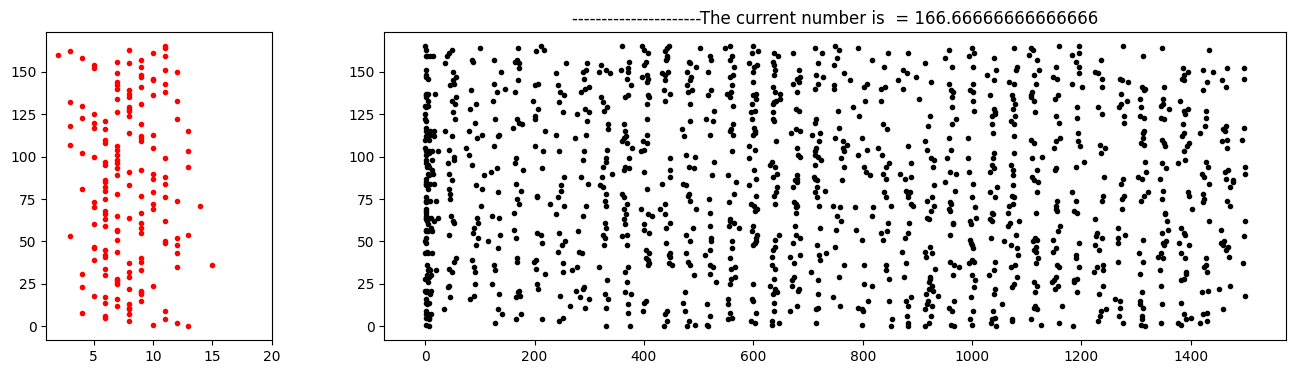

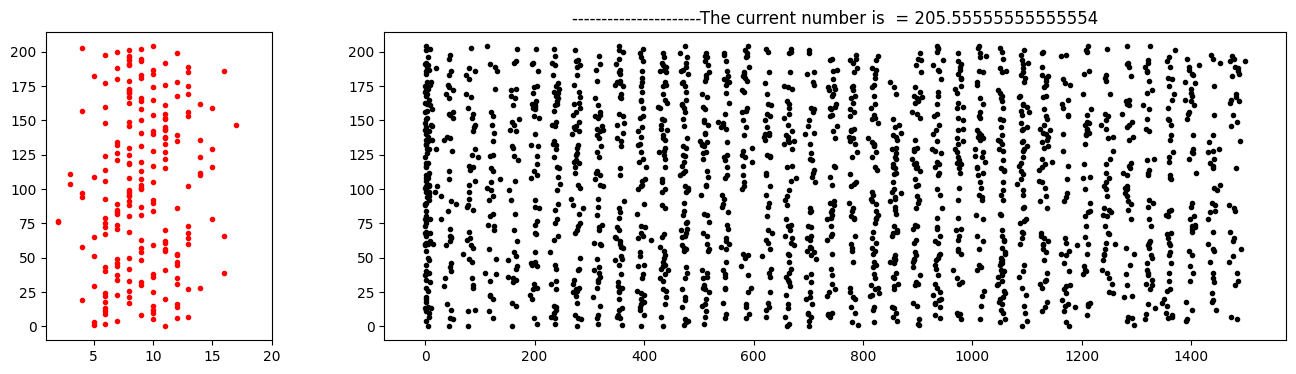

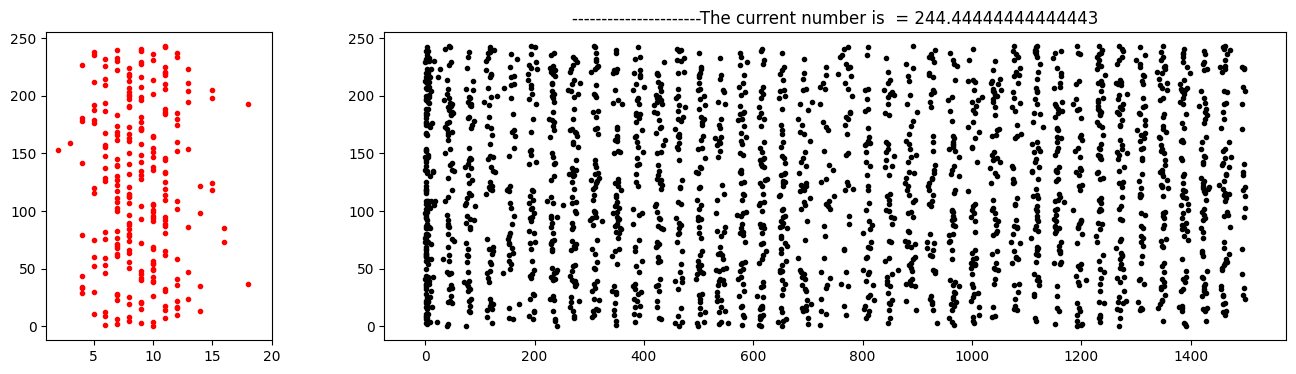

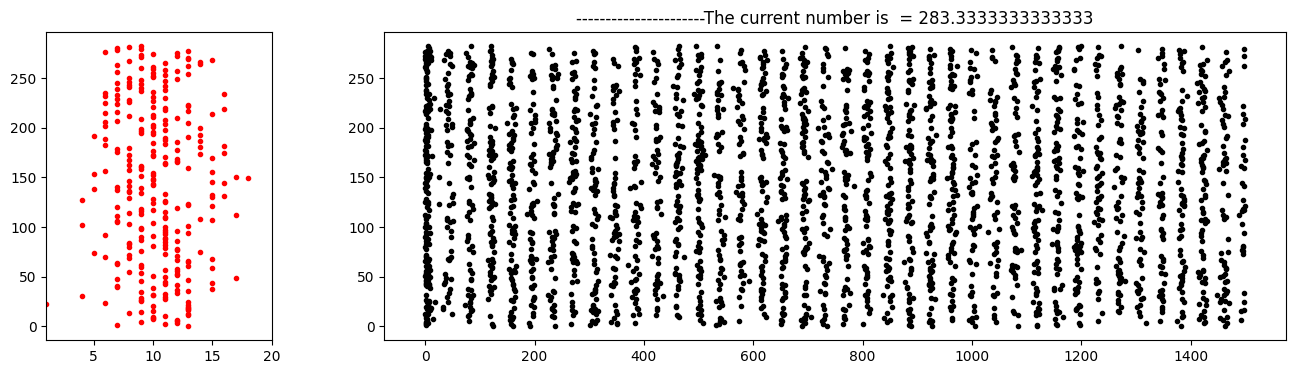

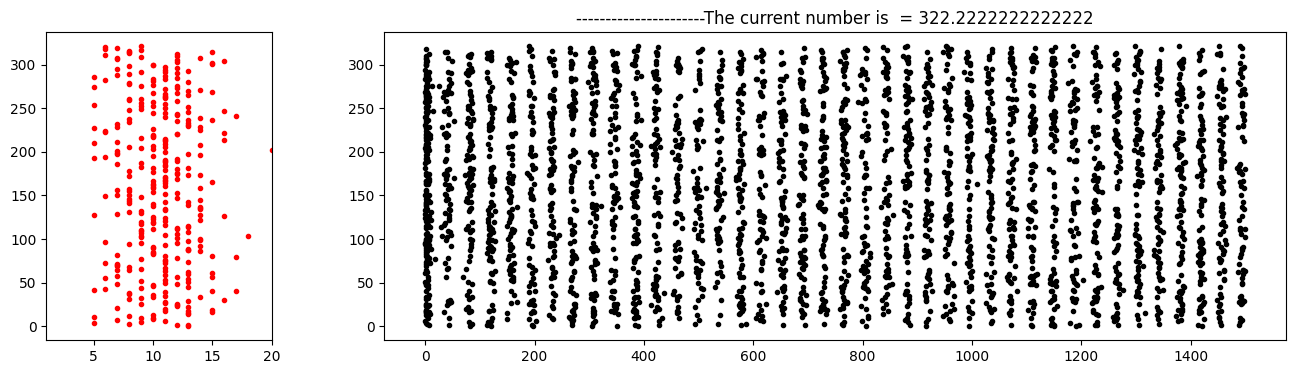

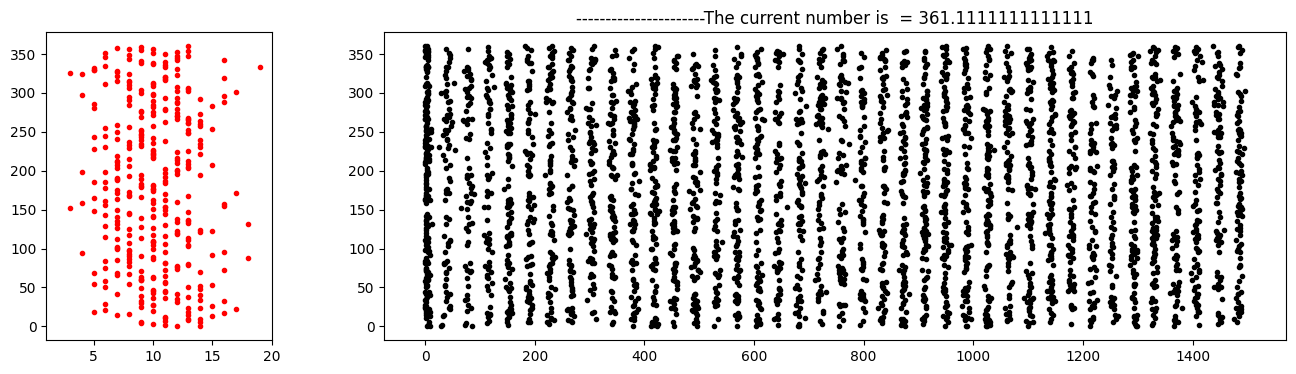

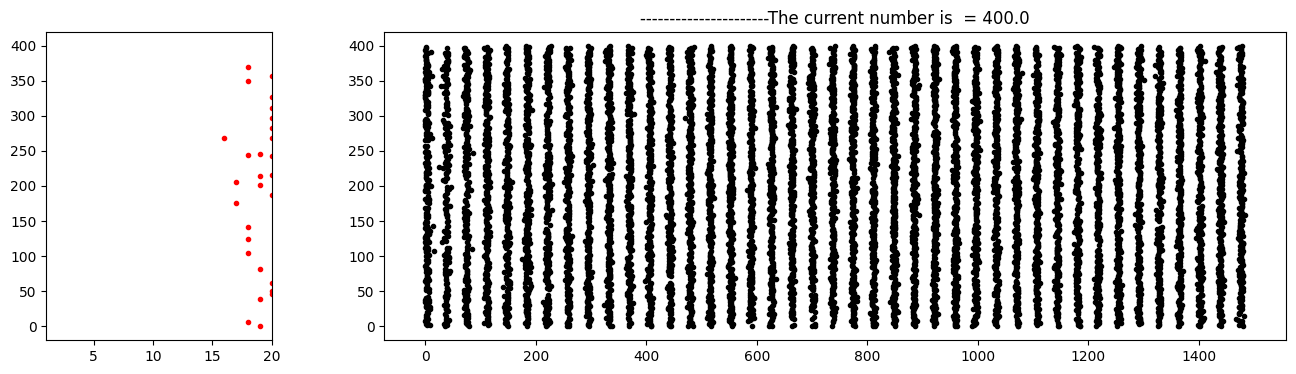

In [179]:
X = linspace(50, 400, 10)

for x in X:
  my_network = MyNetwork(num_neurons = int(x), simulation_time = 1500, THRSLD = 30, freq = 1/x, sIapp = 0.15)
  my_network.create_network()
  print("----------------------The current number is  = ",x)
  fig, ax = plt.subplots(1, 2,figsize=(16, 4), gridspec_kw={'width_ratios': [1, 4]})
  plt.subplot(121)
  plt.plot(my_network.spike_count,arange(my_network.spike_count.shape[0]), ".r")
  plt.xlim([1, 20])
  plt.subplot(122)
  plt.plot(my_network.spikes_t, my_network.spike_i, ".k")
  plt.title("----------------------The current number is  = "+str(x))